## Classification for Heart Disease Dataset

## Importing the libraries

Installing required libraries

In [235]:
!pip3 install numpy
!pip3 install matplotlib    
!pip3 install pandas
!pip3 install sklearn
!pip3 install scikit-learn
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Ridge 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
dataset = dataset.drop(columns=['Job Title'], axis=1)
dataset

,Age,Years_of_Experience,Gender,Education Level,Salary
0,32,5.0,Male,Bachelor's,90000
1,28,3.0,Female,Master's,65000
2,45,15.0,Male,PhD,150000
3,36,7.0,Female,Bachelor's,60000
4,52,20.0,Male,Master's,200000
...,...,...,...,...,...
368,35,8.0,Female,Bachelor's,85000
369,43,19.0,Male,Master's,170000
370,29,2.0,Female,Bachelor's,40000
371,34,7.0,NaN,Bachelor's,90000


In [3]:
len(dataset)

373

In [4]:
dataset.head()

,Age,Years_of_Experience,Gender,Education Level,Salary
0,32,5.0,Male,Bachelor's,90000
1,28,3.0,Female,Master's,65000
2,45,15.0,Male,PhD,150000
3,36,7.0,Female,Bachelor's,60000
4,52,20.0,Male,Master's,200000


In [5]:
dataset.describe()

,Age,Years_of_Experience,Salary
count,373.000000,369.000000,373.000000
mean,37.431635,10.033875,100577.345845
std,7.069073,6.592326,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Years_of_Experience  369 non-null    float64
 2   Gender               368 non-null    object 
 3   Education Level      373 non-null    object 
 4   Salary               373 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.7+ KB


In [7]:
dataset.dtypes

Age                      int64
Years_of_Experience    float64
Gender                  object
Education Level         object
Salary                   int64
dtype: object

In [8]:
dataset.isnull().sum()

Age                    0
Years_of_Experience    4
Gender                 5
Education Level        0
Salary                 0
dtype: int64

In [9]:
dataset.isnull().any()

Age                    False
Years_of_Experience     True
Gender                  True
Education Level        False
Salary                 False
dtype: bool

Specifying dependent and independent columns

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Preprocessing

Taking care of missing categorial values

In [11]:
mode_value = dataset['Gender'].mode()[0]
dataset['Gender'].fillna(mode_value, inplace=True)
dataset.isnull().any()

Age                    False
Years_of_Experience     True
Gender                 False
Education Level        False
Salary                 False
dtype: bool

Taking care of missing numeric values

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :2])
X[:, 0:2] = imputer.transform(X[:, :2])
X

array([[32.0, 5.0, 'Male', "Bachelor's"],
       [28.0, 3.0, 'Female', "Master's"],
       [45.0, 15.0, 'Male', 'PhD'],
       ...,
       [29.0, 2.0, 'Female', "Bachelor's"],
       [34.0, 7.0, nan, "Bachelor's"],
       [44.0, 15.0, 'Female', 'PhD']], dtype=object)

Encoding Categorial Columns (Gender, Education level)

In [13]:
le_gender = LabelEncoder()
le_education = LabelEncoder()
X[:, 2] = le_gender.fit_transform(X[:, 2])
X[:, 3] = le_education.fit_transform(X[:, 3])
X_encoded = X
X_encoded

array([[32.0, 5.0, 1, 0],
       [28.0, 3.0, 0, 1],
       [45.0, 15.0, 1, 2],
       ...,
       [29.0, 2.0, 0, 0],
       [34.0, 7.0, 2, 0],
       [44.0, 15.0, 0, 2]], dtype=object)

Scaling

Text(0, 0.5, 'Years of Experience')

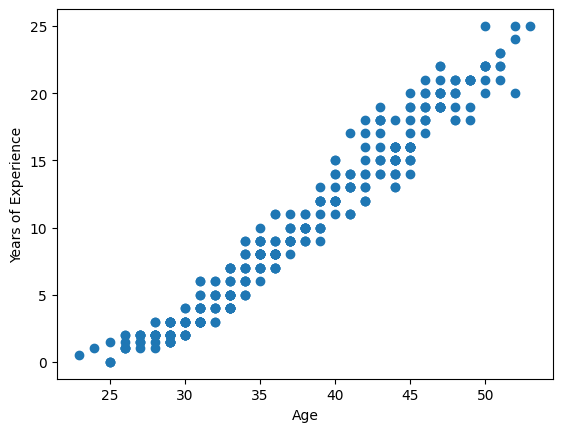

In [14]:
# Identifying scaling problem visually
fig = plt.scatter(dataset.Age, dataset.Years_of_Experience)
plt.xlabel('Age')
plt.ylabel('Years of Experience')

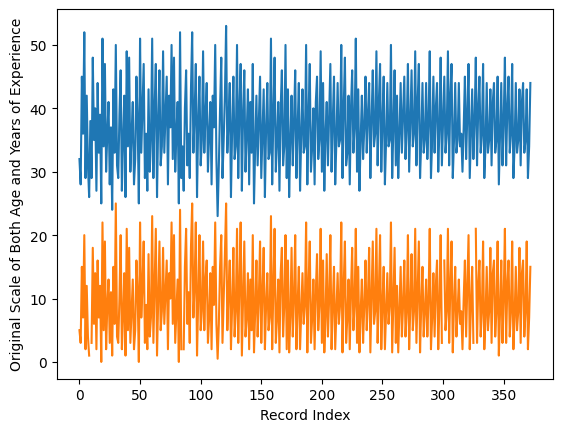

In [15]:
plt.plot(dataset.Age)
plt.plot(dataset.Years_of_Experience)
plt.xlabel('Record Index')
plt.ylabel('Original Scale of Both Age and Years of Experience')
plt.show()

In [16]:
# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X_encoded)
X_standard_scaled

array([[-0.76939807, -0.76876616,  0.88844918, -0.74203458],
       [-1.33600316, -1.07420327, -1.01609993,  0.64185991],
       [ 1.07206849,  0.75841938,  0.88844918,  2.02575439],
       ...,
       [-1.19435189, -1.22692182, -1.01609993, -0.74203458],
       [-0.48609552, -0.46332905,  2.7929983 , -0.74203458],
       [ 0.93041721,  0.75841938, -1.01609993,  2.02575439]])

Text(0, 0.5, 'StandardScaler Scale w/o outlier')

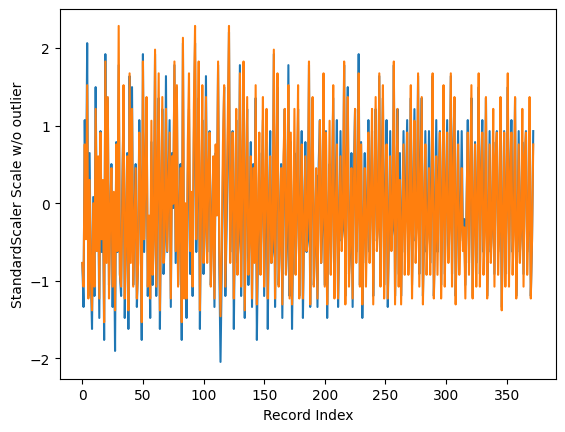

In [17]:
sc_df = pd.DataFrame(X_standard_scaled[:, :2], columns =['Age', 'Years_of_Experience'])
plt.plot(sc_df['Age'])
plt.plot(sc_df['Years_of_Experience'])
plt.xlabel('Record Index')
plt.ylabel('StandardScaler Scale w/o outlier')

In [18]:
# Robust Scaling
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_encoded)
X_robust_scaled

array([[-0.30769231, -0.36363636,  0.        ,  0.        ],
       [-0.61538462, -0.54545455, -1.        ,  1.        ],
       [ 0.69230769,  0.54545455,  0.        ,  2.        ],
       ...,
       [-0.53846154, -0.63636364, -1.        ,  0.        ],
       [-0.15384615, -0.18181818,  1.        ,  0.        ],
       [ 0.61538462,  0.54545455, -1.        ,  2.        ]])

Text(0, 0.5, 'RobustScaler Scale w/o outlier')

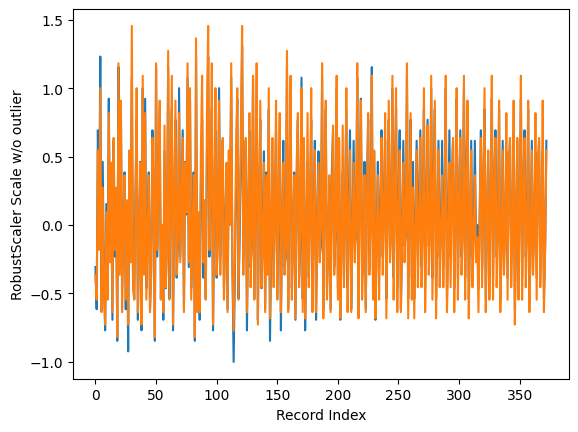

In [19]:
rs_df = pd.DataFrame(X_robust_scaled[:, :2], columns =['Age', 'Years_of_Experience'])
plt.plot(rs_df['Age'])
plt.plot(rs_df['Years_of_Experience'])
plt.xlabel('Record Index')
plt.ylabel('RobustScaler Scale w/o outlier')

Split the dataset into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, test_size=0.3, random_state=0)

print('X_train shape => ', X_train.shape)
print('y_train shape => ', y_train.shape)
print('X_test shape => ', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape =>  (261, 4)
y_train shape =>  (261,)
X_test shape =>  (112, 4)
y_test shape => (112,)


## Linear Regression Model

Training the model

In [21]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Testing the model

In [22]:
y_pred = linear_regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_test), 1)), axis=1))

[[ 40000.          36970.13044108]
 [ 40000.          53165.41580655]
 [ 50000.          42728.83508015]
 [140000.         151266.32683114]
 [ 85000.          74434.53016672]
 [140000.         152550.08754328]
 [ 60000.          54311.88350166]
 [115000.         136836.74566178]
 [ 40000.          47341.07202411]
 [190000.         172601.08033468]
 [ 70000.          60070.58814073]
 [130000.         110752.46219725]
 [150000.         149703.55479543]
 [105000.          96525.81318829]
 [120000.         125390.9902573 ]
 [ 60000.          67594.99697591]
 [ 45000.          56011.9485544 ]
 [ 40000.          47341.07202411]
 [150000.         146725.74376084]
 [180000.         166842.37569561]
 [ 90000.          81893.29985853]
 [ 95000.          87717.64364097]
 [120000.         102147.22481033]
 [ 40000.          39882.3023323 ]
 [170000.         178294.14583038]
 [ 40000.          42794.47422352]
 [ 45000.          54246.24435829]
 [ 50000.          70441.52972376]
 [120000.         12

Predicting new value

In [23]:
new_data_points = np.array([[35, 5, "Male", "PhD"],
                            [20, 1, "Female", "Bachelor's"]])

new_data_points[:, 2] = le_gender.transform(new_data_points[:, 2])
new_data_points[:, 3] = le_education.transform(new_data_points[:, 3])

new_data_points_scaled = robust_scaler.transform(new_data_points)

predictions = linear_regressor.predict(new_data_points_scaled)

print(f"First data point: {predictions[0]:.2f}")
print(f"Second data point: {predictions[1]:.2f}")

First data point: 113341.76
Second data point: 56344.93


Visualizing the dataset

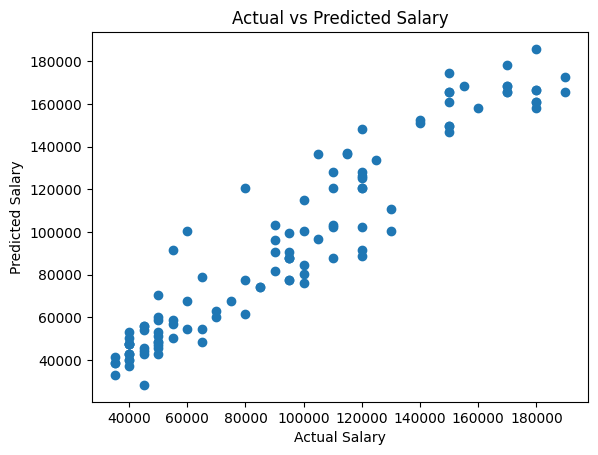

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

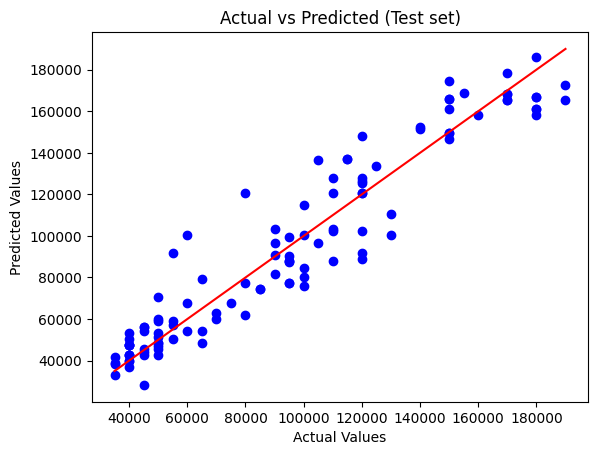

In [25]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

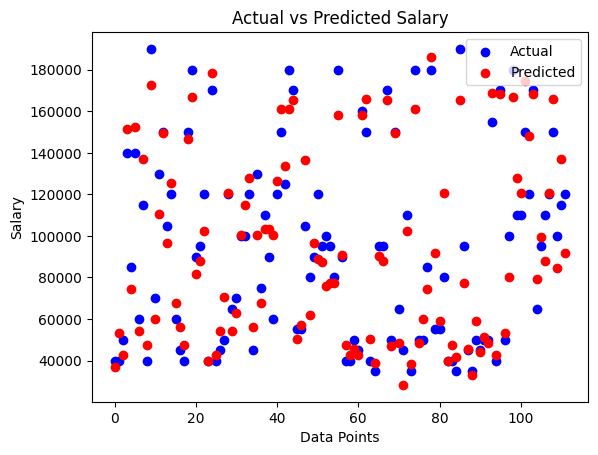

In [26]:
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red')

plt.xlabel("Data Points")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.show()

Evaluating the model(R-Square and MAE/RMSE)

In [27]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

R-squared: 0.9064
MAE: 10794.9813
RMSE: 198622539.5606


## Ridge Regression

Training the model

In [87]:
ridge_regressor = Ridge(alpha=10.0)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=10.0)

Testing the model

In [88]:
y_pred_ridge = ridge_regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_ridge.reshape(len(y_test), 1)), axis=1))

[[ 40000.          38268.97850233]
 [ 40000.          53770.78217458]
 [ 50000.          43921.9271591 ]
 [140000.         150270.61795143]
 [ 85000.          74949.3607785 ]
 [140000.         152127.36886126]
 [ 60000.          55100.25648698]
 [115000.         136202.03030234]
 [ 40000.          48245.40150347]
 [190000.         171321.62856969]
 [ 70000.          60753.20514375]
 [130000.         110300.26874227]
 [150000.         149237.11054005]
 [105000.          96631.38970496]
 [120000.         125550.97757189]
 [ 60000.          67839.36982368]
 [ 45000.          56661.0404958 ]
 [ 40000.          48245.40150347]
 [150000.         146601.98819015]
 [180000.         165668.67991292]
 [ 90000.          82163.09344408]
 [ 95000.          87688.4741152 ]
 [120000.         101757.06176429]
 [ 40000.          41031.66883788]
 [170000.         177102.14521211]
 [ 40000.          43794.35917344]
 [ 45000.          55227.82447263]
 [ 50000.          70729.62814489]
 [120000.         12

Predicting new values

In [89]:
new_data_points = np.array([[35, 5, "Male", "PhD"],
                            [20, 1, "Female", "Bachelor's"]])

new_data_points[:, 2] = le_gender.transform(new_data_points[:, 2])
new_data_points[:, 3] = le_education.transform(new_data_points[:, 3])

new_data_points_scaled = robust_scaler.transform(new_data_points)

predictions = ridge_regressor.predict(new_data_points_scaled)

print(f"First data point: {predictions[0]:.2f}")
print(f"Second data point: {predictions[1]:.2f}")

First data point: 113406.06
Second data point: 57687.99


Visualizing the model

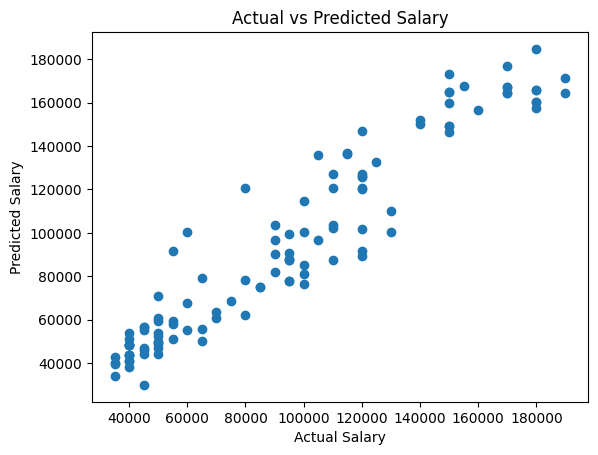

In [90]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

Evaluating the model(R-Square and MAE/RMSE)

In [91]:
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'R-squared: {r2_ridge:.4f}')
print(f'MAE: {mse_ridge:.4f}')
print(f'MAE: {rmse_ridge:.4f}')

R-squared: 0.9072
MAE: 10791.9579
MAE: 196930557.2516


## Logistic Regression

Training the model

In [92]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

Testing the model

In [93]:
y_pred_log = logistic_regressor.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred_log.reshape(len(y_test), 1)), axis=1))

[[ 40000  40000]
 [ 40000  40000]
 [ 50000  40000]
 [140000 170000]
 [ 85000  95000]
 [140000 160000]
 [ 60000  40000]
 [115000 170000]
 [ 40000  40000]
 [190000 180000]
 [ 70000  50000]
 [130000 130000]
 [150000 160000]
 [105000  90000]
 [120000 160000]
 [ 60000  60000]
 [ 45000  40000]
 [ 40000  40000]
 [150000 160000]
 [180000 180000]
 [ 90000  90000]
 [ 95000  60000]
 [120000 130000]
 [ 40000  40000]
 [170000 180000]
 [ 40000  40000]
 [ 45000  40000]
 [ 50000  60000]
 [120000 140000]
 [ 65000  40000]
 [ 70000  50000]
 [100000  80000]
 [100000 140000]
 [120000 130000]
 [ 45000  40000]
 [130000  80000]
 [ 75000  40000]
 [110000 120000]
 [ 90000 120000]
 [ 60000  80000]
 [120000 140000]
 [150000 180000]
 [125000 130000]
 [180000 180000]
 [170000 170000]
 [ 55000  40000]
 [ 55000  45000]
 [105000 130000]
 [ 80000  60000]
 [ 90000  90000]
 [120000  95000]
 [ 95000  90000]
 [100000  60000]
 [ 95000  95000]
 [ 80000  95000]
 [180000 180000]
 [ 90000  60000]
 [ 40000  40000]
 [ 40000  4000

Predicting new value

In [94]:
new_data_points = np.array([[35, 5, "Male", "PhD"],
                            [20, 1, "Female", "Bachelor's"]])

new_data_points[:, 2] = le_gender.transform(new_data_points[:, 2])
new_data_points[:, 3] = le_education.transform(new_data_points[:, 3])

new_data_points_encoded = robust_scaler.transform(new_data_points)

predictions = logistic_regressor.predict(new_data_points_encoded)

print(f"First data point: {predictions[0]:.2f}")
print(f"Second data point: {predictions[1]:.2f}")

First data point: 150000.00
Second data point: 40000.00


Visualizing the dataset

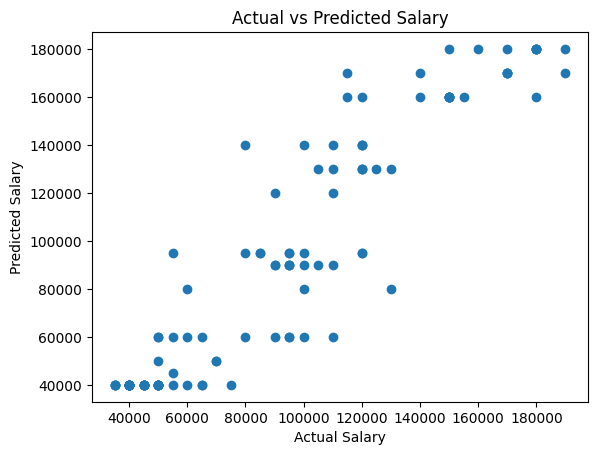

In [95]:
plt.scatter(y_test, y_pred_log)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

Evaluating the model(R-Square and MAE/RMSE)

In [96]:
r2_log = r2_score(y_test, y_pred_log)
mae_log = mean_absolute_error(y_test, y_pred_log)
rmse_log = mean_squared_error(y_test, y_pred_log)

print(f'R-squared: {r2_log:.4f}')
print(f'MAE: {mae_log:.4f}')
print(f'RMSE: {rmse_log:.4f}')

R-squared: 0.8275
MAE: 13303.5714
RMSE: 366071428.5714
